In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import datetime
import numpy as np

**Loading Data Set**



*   Loading mnist dataset
*   Seperate the dataset for training and testing
*   Normalise the dataset from 0-1 by dividing it by 255.0
*   Ploting and see the dataset







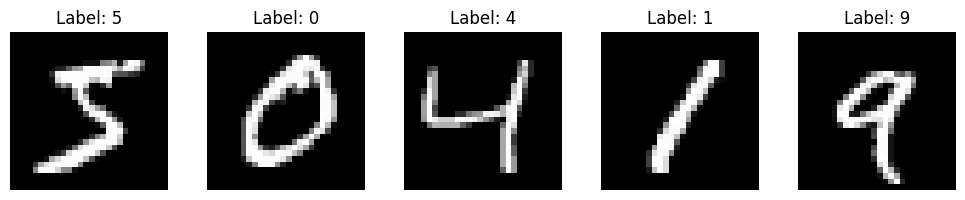

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
plt.figure(figsize=(10,2))
plot = plt.subplot(1,5,1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.imshow(x_train[i-1], cmap='gray')
    plt.title(f"Label: {y_train[i-1]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

**Prepare input**



*   Flatten the input 28 x 28 to 784
*   Change the output categories of training and testing set to one hot encoded values



In [ ]:

x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

y_train_onehot = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_onehot = tf.keras.utils.to_categorical(y_test, num_classes=10)

## **Problem 1:**

# Softmax MNIST Classification

*   A softmax classification with no feature extraction
*   Input layer with shape of 784
*   Output layer node 10
*   Activation Softmax, Optimizer stochastic gradient descent
*   Learning rate - 0.01
*   Epoch - 200











In [ ]:
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)


model_nofeat = tf.keras.models.Sequential()
model_nofeat.add(tf.keras.Input(shape=(784,)))
model_nofeat.add(tf.keras.layers.Dense(10, activation = 'softmax'))


model_nofeat.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
model_nofeat.fit(x=x_train, y=y_train_onehot, epochs=200, verbose=2, callbacks=[tensorboard_callback], validation_data=(x_test, y_test_onehot))

Epoch 1/200
1875/1875 - 7s - 4ms/step - accuracy: 0.8167 - loss: 0.7809 - val_accuracy: 0.8815 - val_loss: 0.4815
Epoch 2/200
1875/1875 - 5s - 3ms/step - accuracy: 0.8806 - loss: 0.4567 - val_accuracy: 0.8956 - val_loss: 0.4019
Epoch 3/200
1875/1875 - 6s - 3ms/step - accuracy: 0.8911 - loss: 0.4035 - val_accuracy: 0.9026 - val_loss: 0.3677
Epoch 4/200
1875/1875 - 5s - 3ms/step - accuracy: 0.8972 - loss: 0.3769 - val_accuracy: 0.9066 - val_loss: 0.3493
Epoch 5/200
1875/1875 - 6s - 3ms/step - accuracy: 0.9010 - loss: 0.3600 - val_accuracy: 0.9085 - val_loss: 0.3363
Epoch 6/200
1875/1875 - 5s - 3ms/step - accuracy: 0.9031 - loss: 0.3482 - val_accuracy: 0.9101 - val_loss: 0.3274
Epoch 7/200
1875/1875 - 6s - 3ms/step - accuracy: 0.9059 - loss: 0.3392 - val_accuracy: 0.9109 - val_loss: 0.3199
Epoch 8/200
1875/1875 - 7s - 4ms/step - accuracy: 0.9077 - loss: 0.3320 - val_accuracy: 0.9138 - val_loss: 0.3141
Epoch 9/200
1875/1875 - 6s - 3ms/step - accuracy: 0.9091 - loss: 0.3261 - val_accuracy: 

## **Weights for Softmax**

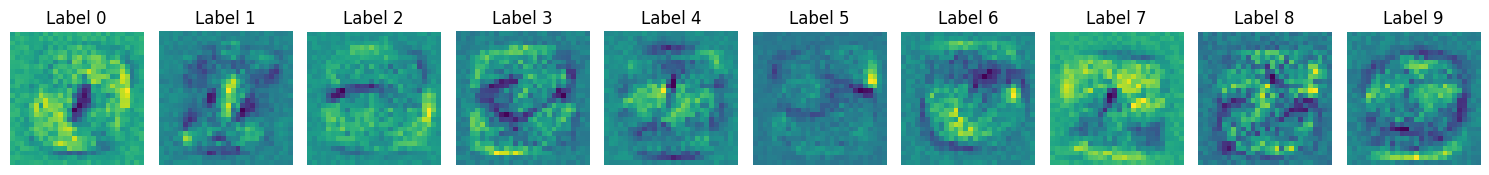

In [ ]:

weights, biases = model_nofeat.layers[0].get_weights()

w_reshape = weights.reshape(28, 28, 10)

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(w_reshape[:,:,i], cmap='viridis')
    plt.title(f"Label {i}")
    plt.axis("off")

plt.tight_layout()
plt.show()



## **Validation accuracy curve**

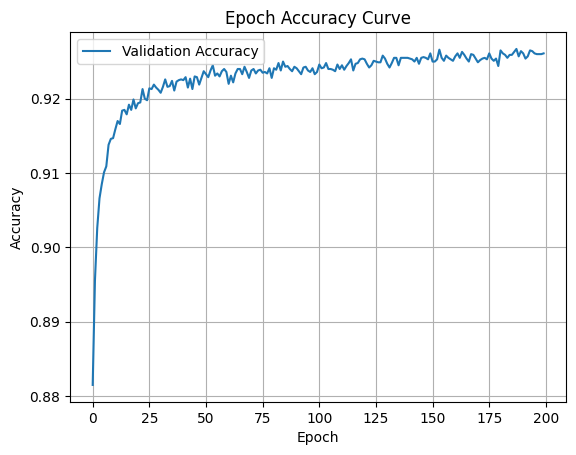

In [ ]:
plt.plot(model_nofeat.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch Accuracy Curve")
plt.legend()
plt.grid(True)
plt.show()

## **Problem 2: Autoencoders**

# Autoencoder MNIST Classification

**Naive Autoencoder**

*   A Autoencoder classification with encoder and decoder
*   Input layer with shape of 784
*   Hidden Layer 100 neurons
*   Output layer node 784
*   Activation Softmax, Optimizer stochastic gradient descent
*   Learning rate - 0.01
*   Epoch - 200


In [ ]:
from tensorflow.keras import layers, models


encoder = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Flatten(),
    layers.Dense(100, activation="relu"),
], name="encoder")
decoder = models.Sequential([
    layers.Input(shape=(100,)),
    layers.Dense(784, activation="sigmoid"),
], name="decoder")

model_naive_AE = models.Sequential([encoder, decoder])

model_naive_AE.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.BinaryCrossentropy(), metrics=['mse'])

model_naive_AE.fit(x_train, x_train , epochs=200, batch_size=128, validation_data=(x_test, x_test), verbose=2)


Epoch 1/200
469/469 - 5s - 11ms/step - loss: 0.6892 - mse: 0.2294 - val_loss: 0.6840 - val_mse: 0.2269
Epoch 2/200
469/469 - 4s - 9ms/step - loss: 0.6780 - mse: 0.2238 - val_loss: 0.6707 - val_mse: 0.2203
Epoch 3/200
469/469 - 5s - 10ms/step - loss: 0.6613 - mse: 0.2156 - val_loss: 0.6490 - val_mse: 0.2097
Epoch 4/200
469/469 - 4s - 9ms/step - loss: 0.6335 - mse: 0.2021 - val_loss: 0.6135 - val_mse: 0.1925
Epoch 5/200
469/469 - 4s - 8ms/step - loss: 0.5902 - mse: 0.1814 - val_loss: 0.5611 - val_mse: 0.1679
Epoch 6/200
469/469 - 5s - 10ms/step - loss: 0.5316 - mse: 0.1545 - val_loss: 0.4968 - val_mse: 0.1393
Epoch 7/200
469/469 - 4s - 8ms/step - loss: 0.4674 - mse: 0.1269 - val_loss: 0.4342 - val_mse: 0.1137
Epoch 8/200
469/469 - 4s - 8ms/step - loss: 0.4110 - mse: 0.1049 - val_loss: 0.3849 - val_mse: 0.0959
Epoch 9/200
469/469 - 5s - 10ms/step - loss: 0.3695 - mse: 0.0907 - val_loss: 0.3512 - val_mse: 0.0853
Epoch 10/200
469/469 - 4s - 8ms/step - loss: 0.3420 - mse: 0.0826 - val_loss: 

## **Hidden Unit Activation Naive_AE**

Hidden unit activation for Naive Autoencoder

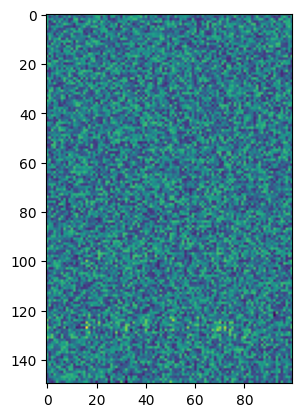

In [ ]:
Hidden_unit = models.Sequential(model_naive_AE.layers[0:1], name="encoder")
#hidden unit activation
Hidden_unit_weights = Hidden_unit.weights[0]
plt.imshow(Hidden_unit_weights[0:150])

In [ ]:
sample_images = {}
for i in range(len(x_test)):
    label = y_test[i]
    if label not in sample_images:
        sample_images[label] = x_test[i]
    if len(sample_images) == 10:
        break
decoder_weights = model_naive_AE.layers[1].get_weights()





*   Reconstructed Images from autoencoder model
*   Weights of Encoder




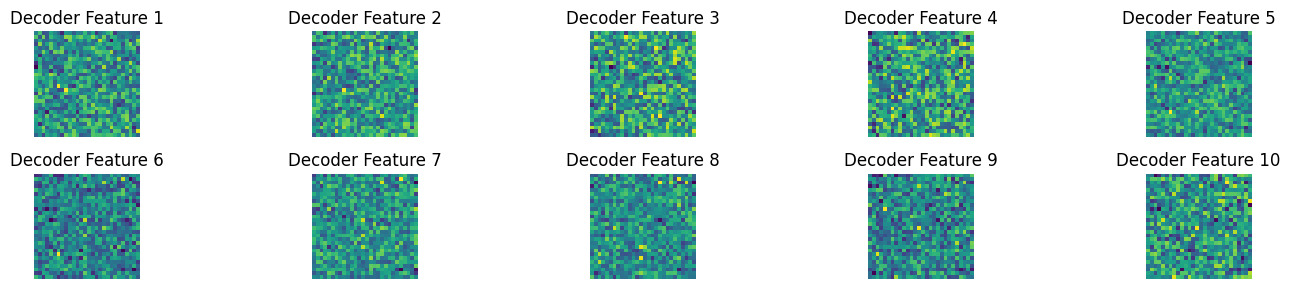

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


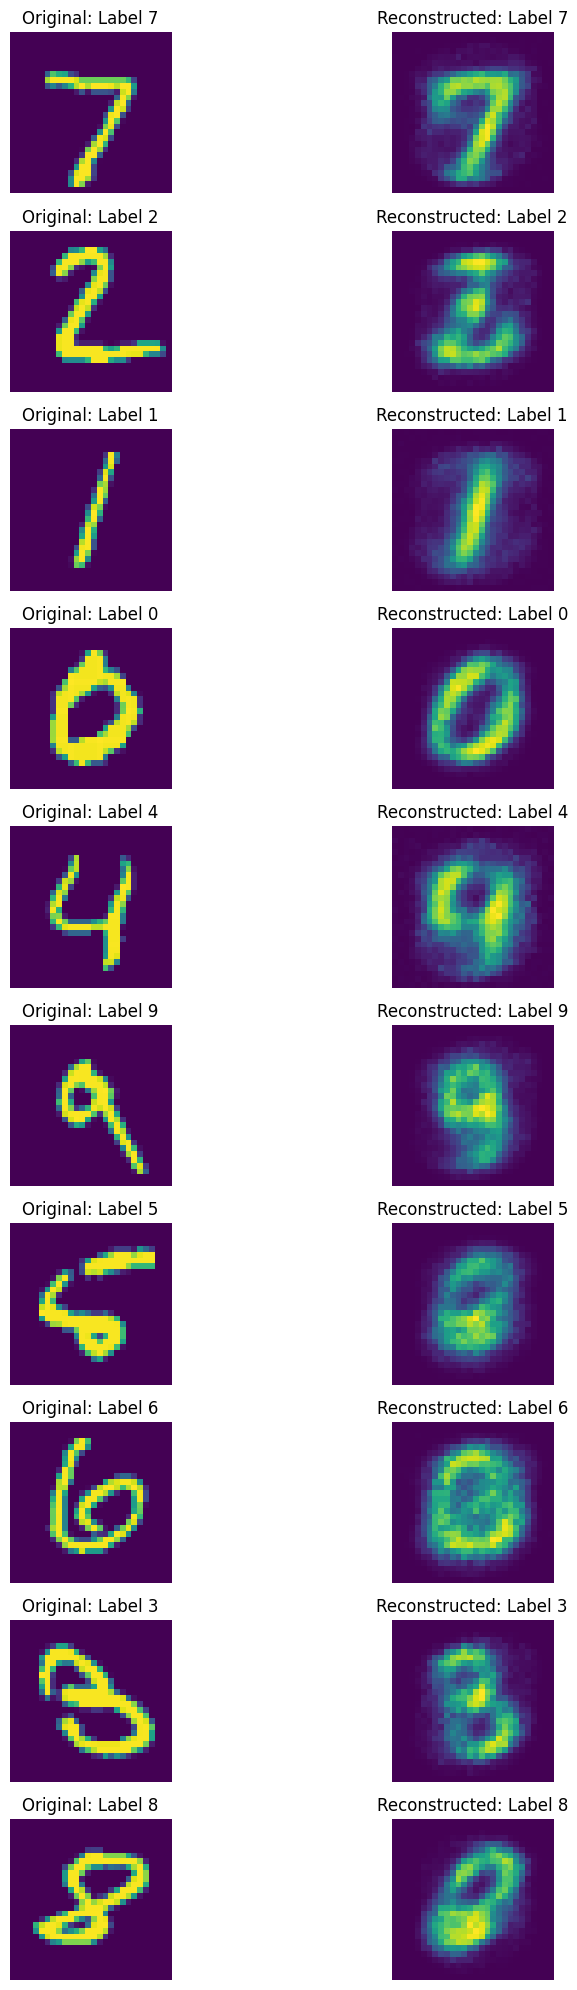

In [ ]:

reshaped_decoder_weights = decoder_weights[0].reshape(28, 28, -1)

plt.figure(figsize=(15, 3))
for i in range(10):
    plt.subplot(2, 5, i + 1)

    plt.imshow(reshaped_decoder_weights[:, :, i], cmap='viridis')
    plt.title(f"Decoder Feature {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 20))
for i, (label, original_image) in enumerate(sample_images.items()):

    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(original_image.reshape(28, 28), cmap='viridis')
    plt.title(f"Original: Label {label}")
    plt.axis('off')


    plt.subplot(10, 2, 2 * i + 2)

    reconstructed_image = model_naive_AE.predict(original_image.reshape(1, -1))
    plt.imshow(reconstructed_image.reshape(28, 28), cmap='viridis')
    plt.title(f"Reconstructed: Label {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Classifier with Naive_AE**



*   Use the above trained Naive AE from encode as feature layer
*   Freeze the encoder weights
*   Train the last layer with softmax
*   Optimizer Stochastic gradient descent
*   Learning rate - 0.002
*   Iteration - 200




In [ ]:
Hidden_unit.trainable = False

classifier = models.Sequential([Hidden_unit,layers.Dense(10, activation="softmax", name="softmax_output")], name="frozen_encoder_classifier")


model_naive_AE_classifier = classifier
model_naive_AE_classifier.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.002), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])

model_naive_AE_classifier.fit(x_train, y_train_onehot , epochs=200, batch_size=128, validation_data=(x_test, y_test_onehot ), verbose=2)

Epoch 1/200
469/469 - 3s - 5ms/step - accuracy: 0.4563 - loss: 1.7681 - val_accuracy: 0.6782 - val_loss: 1.1013
Epoch 2/200
469/469 - 1s - 3ms/step - accuracy: 0.7020 - loss: 1.0020 - val_accuracy: 0.7502 - val_loss: 0.8776
Epoch 3/200
469/469 - 1s - 3ms/step - accuracy: 0.7442 - loss: 0.8606 - val_accuracy: 0.7720 - val_loss: 0.7904
Epoch 4/200
469/469 - 1s - 3ms/step - accuracy: 0.7624 - loss: 0.7929 - val_accuracy: 0.7810 - val_loss: 0.7401
Epoch 5/200
469/469 - 2s - 5ms/step - accuracy: 0.7737 - loss: 0.7506 - val_accuracy: 0.7886 - val_loss: 0.7053
Epoch 6/200
469/469 - 2s - 5ms/step - accuracy: 0.7825 - loss: 0.7209 - val_accuracy: 0.7966 - val_loss: 0.6813
Epoch 7/200
469/469 - 1s - 3ms/step - accuracy: 0.7882 - loss: 0.6983 - val_accuracy: 0.8025 - val_loss: 0.6617
Epoch 8/200
469/469 - 1s - 3ms/step - accuracy: 0.7932 - loss: 0.6801 - val_accuracy: 0.8041 - val_loss: 0.6469
Epoch 9/200
469/469 - 1s - 3ms/step - accuracy: 0.7983 - loss: 0.6652 - val_accuracy: 0.8100 - val_loss:

**Accuracy of Naive Autoencoder**

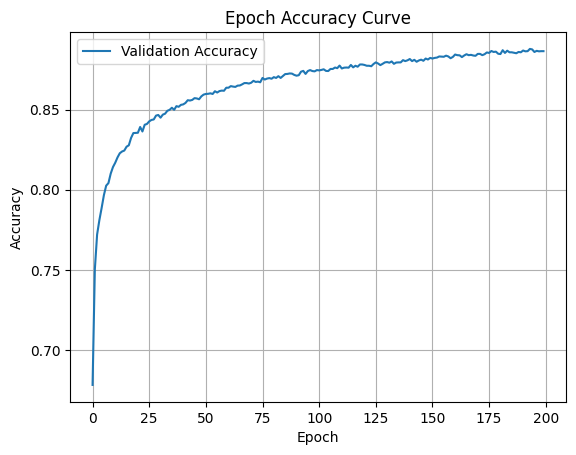

In [ ]:
plt.plot(model_naive_AE_classifier.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch Accuracy Curve")
plt.legend()
plt.grid(True)
plt.show()

# Autoencoder MNIST Classification

**Sparse Autoencoder**

*   A Autoencoder classification with encoder and decoder
*   Input layer with shape of 784
*   Hidden Layer 100 neurons, with introduced Sparsity



\begin{aligned}
\hat{\alpha} & =\frac{1}{T} \sum_{j=0}^{T-1} \boldsymbol{H}_{i, j} \\
g\left(\boldsymbol{H}_{i,:}\right) & =K L(\alpha \| \hat{\alpha})=-\alpha \log \left(\frac{\alpha}{\hat{\alpha}}\right)-(1-\alpha) \log \left(\frac{1-\alpha}{1-\hat{\alpha}}\right) \\
g(\boldsymbol{H}) & =\sum_i g\left(\boldsymbol{H}_{i,:}\right)
\end{aligned}

*   Output layer node 784
*   Activation Softmax, Optimizer adam
*   Learning rate - 0.01
*   Epoch - 200


In [ ]:

from tensorflow.keras import  regularizers

encoder = models.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(100, activation="relu",
                  activity_regularizer=regularizers.l1(1e-5)),], name="encoder")


decoder = models.Sequential([
    layers.Input(shape=(100,)),
    layers.Dense(784, activation="sigmoid",),], name="decoder")


model_sparse_autoencoder = models.Sequential([encoder, decoder])

model_sparse_autoencoder.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(), metrics=['mse'])

model_sparse_autoencoder.fit(x_train, x_train , epochs=200, batch_size=128, validation_data=(x_test, x_test), verbose=2)

Epoch 1/200
469/469 - 5s - 12ms/step - loss: 0.2623 - mse: 0.0495 - val_loss: 0.1809 - val_mse: 0.0271
Epoch 2/200
469/469 - 5s - 11ms/step - loss: 0.1699 - mse: 0.0242 - val_loss: 0.1595 - val_mse: 0.0211
Epoch 3/200
469/469 - 4s - 8ms/step - loss: 0.1544 - mse: 0.0197 - val_loss: 0.1478 - val_mse: 0.0177
Epoch 4/200
469/469 - 4s - 8ms/step - loss: 0.1448 - mse: 0.0170 - val_loss: 0.1402 - val_mse: 0.0156
Epoch 5/200
469/469 - 5s - 11ms/step - loss: 0.1386 - mse: 0.0153 - val_loss: 0.1351 - val_mse: 0.0144
Epoch 6/200
469/469 - 4s - 8ms/step - loss: 0.1342 - mse: 0.0142 - val_loss: 0.1313 - val_mse: 0.0134
Epoch 7/200
469/469 - 4s - 8ms/step - loss: 0.1305 - mse: 0.0133 - val_loss: 0.1279 - val_mse: 0.0126
Epoch 8/200
469/469 - 5s - 11ms/step - loss: 0.1276 - mse: 0.0127 - val_loss: 0.1253 - val_mse: 0.0121
Epoch 9/200
469/469 - 4s - 8ms/step - loss: 0.1251 - mse: 0.0122 - val_loss: 0.1232 - val_mse: 0.0117
Epoch 10/200
469/469 - 4s - 8ms/step - loss: 0.1230 - mse: 0.0118 - val_loss: 

**Hidden unit activation of Sparse Autoencoder**

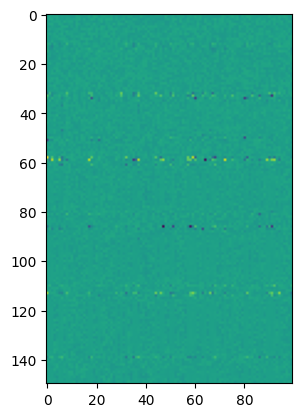

In [ ]:
Hidden_unit_sparse_AE = models.Sequential(model_sparse_autoencoder.layers[0:1], name="encoder")

Hidden_unit_weights_sparse_AE = Hidden_unit_sparse_AE.weights[0]
plt.imshow(Hidden_unit_weights_sparse_AE[0:150])

In [ ]:
sample_images = {}
for i in range(len(x_test)):
    label = y_test[i]
    if label not in sample_images:
        sample_images[label] = x_test[i]
    if len(sample_images) == 10:
        break
decoder_weights_sparse_AE = model_sparse_autoencoder.layers[1].get_weights()




*   Weights of Spare AE
*   Reconstructed image from Sparse AE



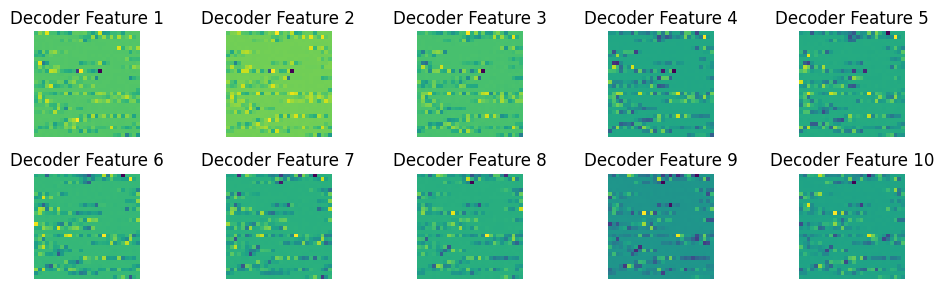

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


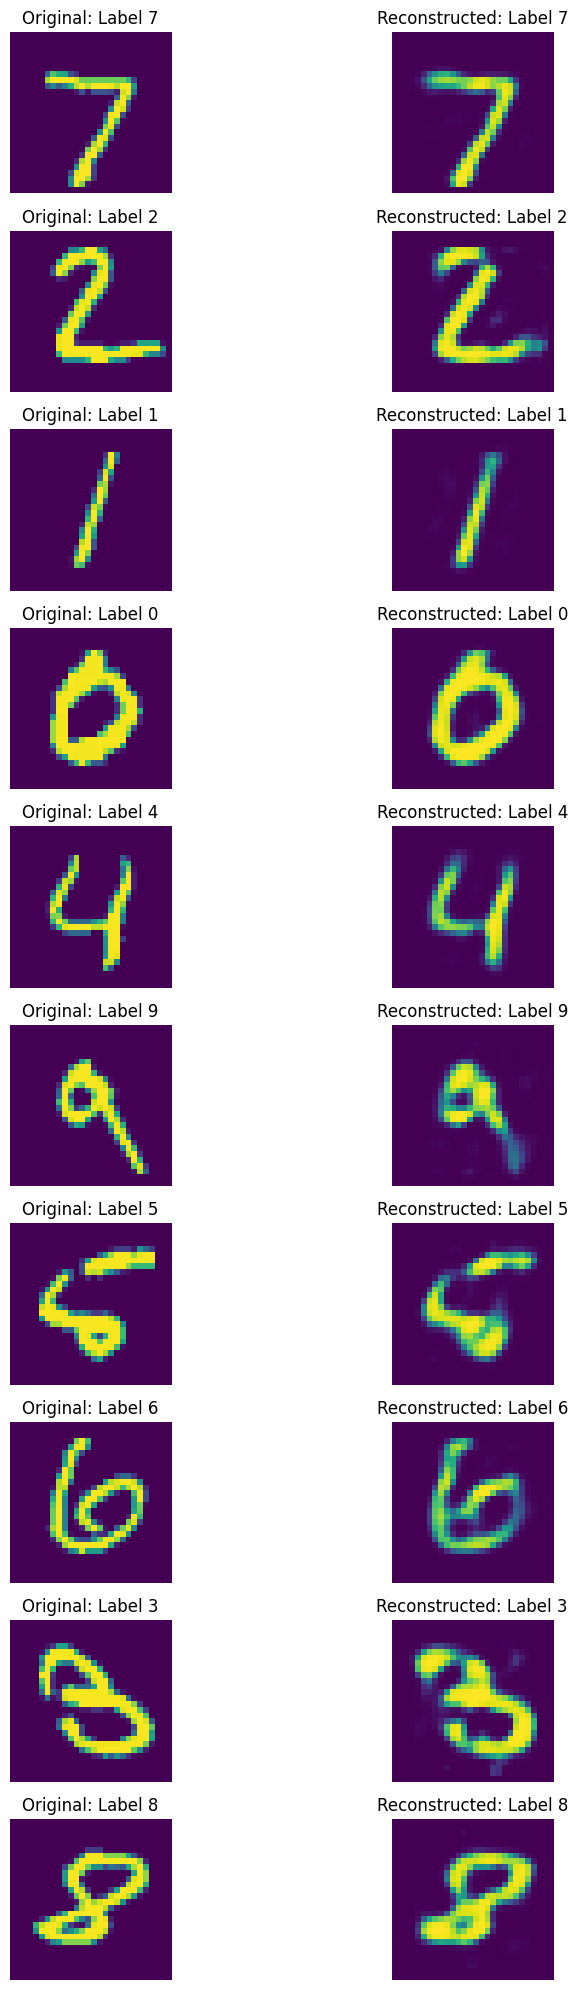

In [ ]:

reshaped_decoder_weights = decoder_weights_sparse_AE[0].reshape(28, 28, -1)

plt.figure(figsize=(10, 3))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(reshaped_decoder_weights[:, :, i], cmap='viridis')
    plt.title(f"Decoder Feature {i+1}")
    plt.axis('off')

plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 20))
for i, (label, original_image) in enumerate(sample_images.items()):
    plt.subplot(10, 2, 2 * i + 1)
    plt.imshow(original_image.reshape(28, 28), cmap='viridis')
    plt.title(f"Original: Label {label}")
    plt.axis('off')


    plt.subplot(10, 2, 2 * i + 2)
    reconstructed_image = model_sparse_autoencoder.predict(original_image.reshape(1, -1))
    plt.imshow(reconstructed_image.reshape(28, 28), cmap='viridis')
    plt.title(f"Reconstructed: Label {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

**Classifier with Sparse_AE**



*   Use the above trained Sparse AE from encode as feature layer
*   Freeze the encoder weights
*   Train the last layer with softmax
*   Optimizer Stochastic gradient descent
*   Iteration - 200


In [ ]:

Hidden_unit_sparse_AE.trainable = False

classifier_sparse_AE = models.Sequential([Hidden_unit_sparse_AE,layers.Dense(10, activation="softmax", name="softmax_output")], name="frozen_encoder_classifier")


model_sparse_AE_classifier = classifier_sparse_AE
model_sparse_AE_classifier.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])


model_sparse_AE_classifier.fit(x_train, y_train_onehot , epochs=200, batch_size=128, validation_data=(x_test, y_test_onehot ), verbose=2)

Epoch 1/200
469/469 - 3s - 6ms/step - accuracy: 0.1945 - loss: 2.2696 - val_accuracy: 0.2974 - val_loss: 2.2231
Epoch 2/200
469/469 - 2s - 5ms/step - accuracy: 0.4011 - loss: 2.1814 - val_accuracy: 0.4771 - val_loss: 2.1388
Epoch 3/200
469/469 - 1s - 3ms/step - accuracy: 0.5389 - loss: 2.1019 - val_accuracy: 0.5742 - val_loss: 2.0606
Epoch 4/200
469/469 - 1s - 3ms/step - accuracy: 0.6148 - loss: 2.0274 - val_accuracy: 0.6382 - val_loss: 1.9872
Epoch 5/200
469/469 - 1s - 3ms/step - accuracy: 0.6657 - loss: 1.9573 - val_accuracy: 0.6814 - val_loss: 1.9180
Epoch 6/200
469/469 - 1s - 3ms/step - accuracy: 0.6990 - loss: 1.8913 - val_accuracy: 0.7112 - val_loss: 1.8530
Epoch 7/200
469/469 - 2s - 3ms/step - accuracy: 0.7208 - loss: 1.8292 - val_accuracy: 0.7324 - val_loss: 1.7920
Epoch 8/200
469/469 - 1s - 3ms/step - accuracy: 0.7354 - loss: 1.7709 - val_accuracy: 0.7495 - val_loss: 1.7346
Epoch 9/200
469/469 - 2s - 3ms/step - accuracy: 0.7462 - loss: 1.7162 - val_accuracy: 0.7627 - val_loss:

**Accuracy curve of Sparse_AE**

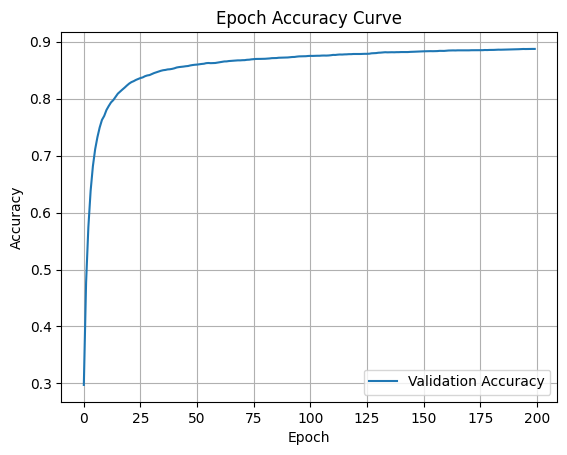

In [ ]:
plt.plot(model_sparse_AE_classifier.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch Accuracy Curve")
plt.legend()
plt.grid(True)
plt.show()

##**Problem 3: A shallow NN**




*   Backpropagation on a Shallow Network
*   Feature learning is harmonized with NN training
*   Optimizer Stochastic Gradient decent
*   Epoch 200, Learning Rate 0.01
*   Input layer - 784, Hidden layer -100, Output layer -10






In [ ]:

model_nn = tf.keras.models.Sequential()
model_nn.add(tf.keras.Input(shape=(784,)))
model_nn.add(tf.keras.layers.Dense(100, activation="relu"))
model_nn.add(tf.keras.layers.Dense(10, activation = 'softmax'))

model_nn.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
model_nn.fit(x=x_train, y=y_train_onehot, epochs=200, verbose=2, validation_data=(x_test, y_test_onehot))

Epoch 1/200
1875/1875 - 7s - 3ms/step - accuracy: 0.8372 - loss: 0.6414 - val_accuracy: 0.9042 - val_loss: 0.3529
Epoch 2/200
1875/1875 - 5s - 3ms/step - accuracy: 0.9059 - loss: 0.3373 - val_accuracy: 0.9173 - val_loss: 0.2934
Epoch 3/200
1875/1875 - 5s - 3ms/step - accuracy: 0.9183 - loss: 0.2895 - val_accuracy: 0.9250 - val_loss: 0.2644
Epoch 4/200
1875/1875 - 6s - 3ms/step - accuracy: 0.9266 - loss: 0.2607 - val_accuracy: 0.9313 - val_loss: 0.2403
Epoch 5/200
1875/1875 - 5s - 3ms/step - accuracy: 0.9327 - loss: 0.2386 - val_accuracy: 0.9373 - val_loss: 0.2203
Epoch 6/200
1875/1875 - 6s - 3ms/step - accuracy: 0.9380 - loss: 0.2206 - val_accuracy: 0.9405 - val_loss: 0.2075
Epoch 7/200
1875/1875 - 5s - 2ms/step - accuracy: 0.9420 - loss: 0.2056 - val_accuracy: 0.9440 - val_loss: 0.1958
Epoch 8/200
1875/1875 - 5s - 3ms/step - accuracy: 0.9452 - loss: 0.1925 - val_accuracy: 0.9473 - val_loss: 0.1835
Epoch 9/200
1875/1875 - 5s - 3ms/step - accuracy: 0.9492 - loss: 0.1808 - val_accuracy: 

**Accuracy curve of Shallow NN**

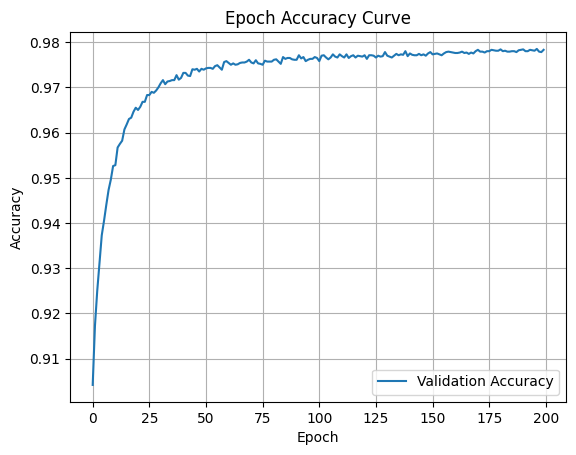

In [ ]:
plt.plot(model_nn.history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Epoch Accuracy Curve")
plt.legend()
plt.grid(True)
plt.show()

# **Accuracy curve plot of all the results**

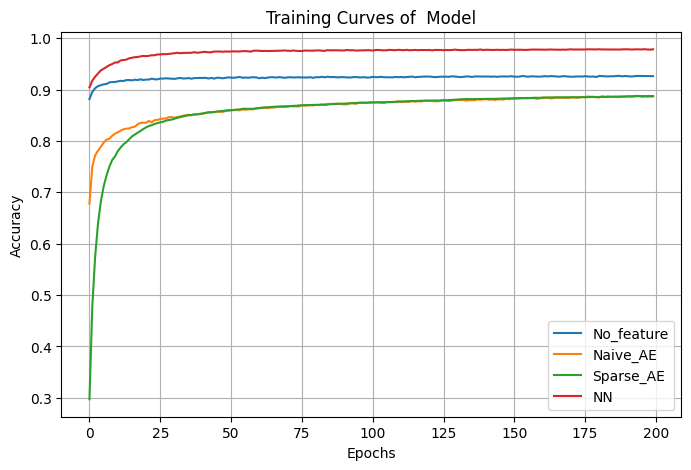

In [ ]:

plt.figure(figsize=(8, 5))

plt.plot(model_nofeat.history.history['val_accuracy'], label='No_feature')

plt.plot(model_naive_AE_classifier.history.history['val_accuracy'], label='Naive_AE')

plt.plot(model_sparse_AE_classifier.history.history['val_accuracy'], label='Sparse_AE')

plt.plot(model_nn.history.history['val_accuracy'], label='NN')

plt.title("Training Curves of  Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
from google.colab import files
files.download("/content/drive/MyDrive/Colab Notebooks/Autoencoder_HW_Problem_1_2_3.i")


FileNotFoundError: Cannot find file: /content/drive/MyDrive/Colab Notebooks/Autoencoder_HW_Problem_1_2_3.html

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
